In [27]:
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import matplotlib.gridspec as gridspec

In [28]:
txt_extremes = "no"

In [29]:
mpl.rcParams['font.family'] = 'serif'

In [30]:
# Read results:
dir_results_parent = "/orcd/pool/005/vianajr/cluster_ages_1/results/single_case/"

dir_results_case = dir_results_parent + f"single_case_5im_remextremes_{txt_extremes}_augment_no_blackout_no_normby_five-images/"

dir_results_model = dir_results_case + "model_0/"

In [31]:
# Load the pickle file
with open(dir_results_model + 'loss_data.pkl', 'rb') as f:
    data = pickle.load(f)

# Extract variables
tr_MSE_nrm = data['tr_MSE_nrm']
vl_MSE_nrm = data['vl_MSE_nrm']

# Print to check
print("Training MSE (Normalized):", tr_MSE_nrm)
print("Validation MSE (Normalized):", vl_MSE_nrm)

Training MSE (Normalized): [0.08764409 0.0647734  0.06120212 0.05649694 0.05052908 0.04327006
 0.03727766 0.03282017 0.03052111 0.02892147 0.02791066 0.02721466
 0.02655164 0.02617331 0.02559042 0.02517034 0.0250556  0.02444101
 0.02418417 0.02395117 0.02370855 0.02328515 0.02295311 0.02281914
 0.02248709 0.02220105 0.02194775 0.02186123 0.02149765 0.02129043
 0.02103078 0.02109598 0.02071995 0.02079184 0.02016084 0.02009428
 0.01985225 0.01977404 0.01943867 0.01932799 0.0191463  0.01892863
 0.01877833 0.01854594 0.01852514 0.01821334 0.01822515 0.0179379
 0.01780374 0.01763761 0.01738976 0.01732202 0.01723063 0.01704957
 0.01686696 0.01687948 0.01685392 0.0164997  0.01662317 0.01621521
 0.01613511 0.01596012 0.01582273 0.01570957 0.01583092 0.01557087
 0.01532619 0.01523323 0.01517233 0.01506374 0.01489102 0.0147842
 0.01469572 0.01468502 0.01445882 0.01453949 0.01438166 0.01427919
 0.01413666 0.01422464 0.01389463 0.01373931 0.01379651 0.01359836
 0.01351375 0.01341123 0.01335641 0.0

In [32]:
# Load the pickle file
with open(dir_results_model + 'preds_and_trues.pkl', 'rb') as f:
    data = pickle.load(f)

# Extract variables
dnrm_Y_tr_pred = data['dnrm_Y_tr_pred']
dnrm_Y_vl_pred = data['dnrm_Y_vl_pred']
dnrm_Y_ts_pred = data['dnrm_Y_ts_pred']

use_Y_tr = data['use_Y_tr']
use_Y_vl = data['use_Y_vl']
use_Y_ts = data['use_Y_ts']

# Print to check
print("Tr Predictions Shape:", dnrm_Y_tr_pred.shape)
print("Vl Predictions Shape:", dnrm_Y_vl_pred.shape)
print("Ts Predictions Shape:", dnrm_Y_ts_pred.shape)
print()
print("Tr True Values Shape:", use_Y_tr.shape)
print("Vl True Values Shape:", use_Y_vl.shape)
print("Ts True Values Shape:", use_Y_ts.shape)

Tr Predictions Shape: (6055,)
Vl Predictions Shape: (1298,)
Ts Predictions Shape: (1298,)

Tr True Values Shape: (6055,)
Vl True Values Shape: (1298,)
Ts True Values Shape: (1298,)


In [33]:
# For validation:
y_pred = dnrm_Y_ts_pred
y_true = use_Y_ts

# Compute absolute error
error = np.abs(y_pred - y_true)

# Compute min and max
min_val = min(y_true.min(), y_pred.min())
max_val = max(y_true.max(), y_pred.max())

In [34]:
import matplotlib.cm as cm
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.2, maxval=1.0, n=256):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{minval:.2f},{maxval:.2f})',
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

# Truncate
my_cmap = truncate_colormap(plt.get_cmap("Purples"), 0.1, 1.0)


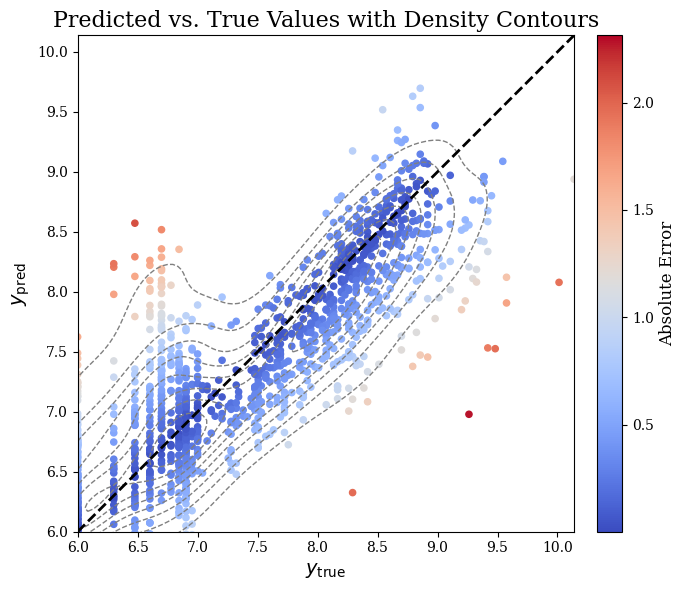

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming y_true and y_pred are your data arrays
error = np.abs(y_pred - y_true)

# Define the number of levels for the contour plot
num_levels = 10

# Perform kernel density estimation
xy = np.vstack([y_true, y_pred])
kde = gaussian_kde(xy)
xi, yi = np.linspace(min(y_true), max(y_true), 100), np.linspace(min(y_pred), max(y_pred), 100)
xi, yi = np.meshgrid(xi, yi)
zi = kde(np.vstack([xi.flatten(), yi.flatten()]))

# Create a square figure
fig, ax = plt.subplots(figsize=(7, 6))

# Plot the contour lines
contour = ax.contour(xi, yi, zi.reshape(xi.shape), levels=num_levels, linewidths=1, colors='gray', linestyles='dashed')

# Plot the scatter plot with color-coded error using the custom colormap
sc = ax.scatter(y_true, y_pred, c=error, cmap='coolwarm', s=20)

# Identity line (perfect predictions)
ax.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'k--', linewidth=2)

# Set axis limits to ensure equal scale on both axes
ax.set_xlim(min(y_true), max(y_true))
ax.set_ylim(min(y_true), max(y_true))
ax.set_aspect('equal', adjustable='box')

# Labels and title
ax.set_xlabel(r'$y_{\mathrm{true}}$', fontsize=14)
ax.set_ylabel(r'$y_{\mathrm{pred}}$', fontsize=14)
ax.set_title('Predicted vs. True Values with Density Contours', fontsize=16)

# Create colorbar and adjust it to match the height of the plot
cbar = plt.colorbar(sc, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Absolute Error', fontsize=12)

# Improve layout
plt.tight_layout()

# Show plot
plt.show()


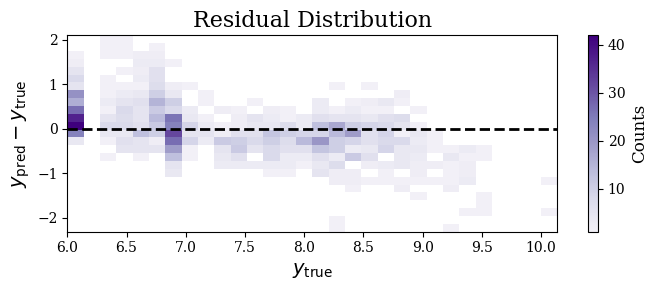

In [36]:
# Assuming y_true and y_pred are your data arrays
residuals = y_pred - y_true

# Define the number of bins for x and y axes
x_bins = 30  # Number of bins for y_true
y_bins = 25  # Number of bins for residuals

# Create the 2D histogram
fig, ax = plt.subplots(figsize=(7, 3))
h, xedges, yedges, image = ax.hist2d(
    y_true, residuals, bins=(x_bins, y_bins), cmap=my_cmap, cmin=1
)

# Add a horizontal reference line at zero residual
ax.axhline(0, color='k', linestyle='--', linewidth=2)

# Set axis limits
ax.set_xlim(min(y_true), max(y_true))
ax.set_ylim(min(residuals), max(residuals))

# Labels and title
ax.set_xlabel(r'$y_{\mathrm{true}}$', fontsize=14)
ax.set_ylabel(r'$y_{\mathrm{pred}} - y_{\mathrm{true}}$', fontsize=14)
ax.set_title('Residual Distribution', fontsize=16)

# Add a colorbar
cbar = plt.colorbar(image, ax=ax, orientation='vertical')
cbar.set_label('Counts', fontsize=12)

# Improve layout
plt.tight_layout()

# Show plot
plt.show()


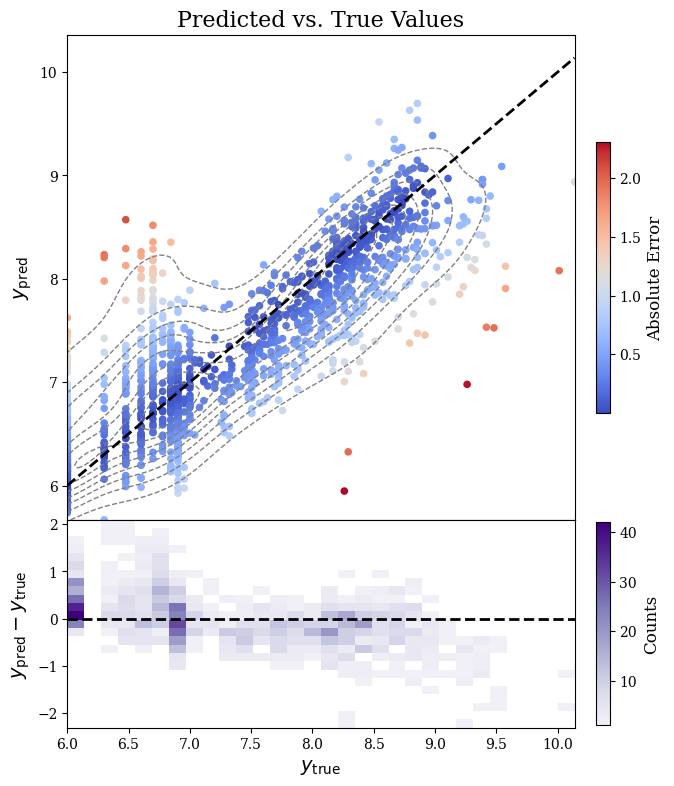

In [37]:

# Define the number of levels for the contour plot
num_levels = 10

# Perform kernel density estimation
xy = np.vstack([y_true, y_pred])
kde = gaussian_kde(xy)
xi, yi = np.linspace(min(y_true), max(y_true), 100), np.linspace(min(y_pred), max(y_pred), 100)
xi, yi = np.meshgrid(xi, yi)
zi = kde(np.vstack([xi.flatten(), yi.flatten()]))

# Create a figure
fig = plt.figure(figsize=(7, 9))

# Define GridSpec with height ratios
gs = gridspec.GridSpec(2, 1, height_ratios=[7, 3])  # 70% for the first, 30% for the second

# First subplot: Predicted vs. True Values with Density Contours
ax1 = fig.add_subplot(gs[0])
contour = ax1.contour(xi, yi, zi.reshape(xi.shape), levels=num_levels, linewidths=1, colors='gray', linestyles='dashed')
sc1 = ax1.scatter(y_true, y_pred, c=error, cmap='coolwarm', s=20)
ax1.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'k--', linewidth=2)
ax1.set_ylabel(r'$y_{\mathrm{pred}}$', fontsize=14)
ax1.set_title('Predicted vs. True Values', fontsize=16)
ax1.set_xlim(min(y_true), max(y_true))
ax1.set_xticklabels([])

# Second subplot: Residual Distribution
ax2 = fig.add_subplot(gs[1])
x_bins = 30  # Number of bins for y_true
y_bins = 25  # Number of bins for residuals
h, xedges, yedges, image = ax2.hist2d(y_true, residuals, bins=(x_bins, y_bins), cmap=my_cmap, cmin=1)
ax2.axhline(0, color='k', linestyle='--', linewidth=2)
ax2.set_xlabel(r'$y_{\mathrm{true}}$', fontsize=14)
ax2.set_ylabel(r'$y_{\mathrm{pred}} - y_{\mathrm{true}}$', fontsize=14)
ax2.set_xlim(min(y_true), max(y_true))


# Adjust layout to remove space between subplots
plt.subplots_adjust(hspace=0)


# Add colorbars with the same thickness
cbar_fraction = 0.025  # Ensures both colorbars have the same thickness


# Add colorbars with the same thickness
cbar_aspect = 20  # Adjust to control thickness

# First colorbar (Absolute Error)
cbar1 = plt.colorbar(sc1, ax=ax1, fraction=cbar_fraction, aspect=20, pad=0.04)
cbar1.set_label('Absolute Error', fontsize=12)

# Second colorbar (Counts)
cbar2 = plt.colorbar(image, ax=ax2, fraction=cbar_fraction, aspect=15, pad=0.04)
cbar2.set_label('Counts', fontsize=12)

# Save plot
plt.savefig(f"0_pred_vs_true_{txt_extremes}.svg")


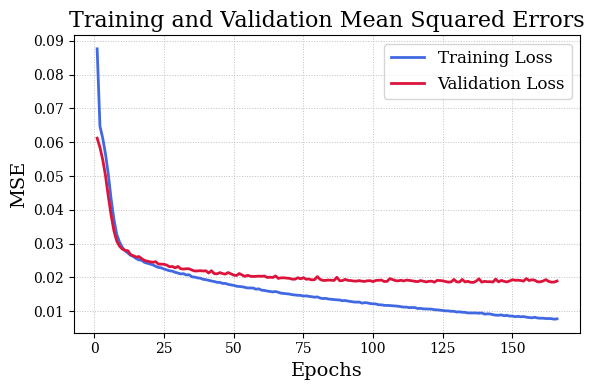

In [38]:
import matplotlib.pyplot as plt

# Example training loss and validation loss data
epochs = range(1, len(tr_MSE_nrm) + 1)  # Assuming loss and val_loss are defined lists
fig, ax = plt.subplots(figsize=(6, 4))

# Plot loss curves
ax.plot(epochs, tr_MSE_nrm, label='Training Loss', color='royalblue', linestyle='-', linewidth=2)
ax.plot(epochs, vl_MSE_nrm, label='Validation Loss', color='crimson', linestyle='-', linewidth=2)

# Labels and title
ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('MSE', fontsize=14)
ax.set_title('Training and Validation Mean Squared Errors', fontsize=16)

# Grid and legend
ax.grid(True, linestyle=':', linewidth=0.7, alpha=0.8)
ax.legend(fontsize=12)

# Optional: Use log scale if loss varies significantly
# ax.set_yscale('log')

# Save as high-resolution figure
plt.tight_layout()

# Save plot
plt.savefig(f"0_learning_extremes_{txt_extremes}.svg")
